In [180]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from linregress import linearly_regress
from linregress import model_averages

In [181]:
# Open and view CSV file
df = pd.read_csv('data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [182]:
# Drop NaNs
df.dropna(inplace=True)

## Cleaning Data

In [183]:
# View all unique values in 'waterfront' column
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [184]:
# Encode 'waterfront' column
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [185]:
# View all unique values in 'view' column
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [186]:
# Encode 'view' column 
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [187]:
# View all unique values in 'grade' column
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [188]:
# Encode 'grade' column
df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [189]:
# View all unique values in 'condition' column
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [190]:
# Encode 'condition' column
df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [191]:
# Set Year Renovated to Year Built if Year Renovated = 0
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [192]:
# Drop columns that are unneccessary and to avoid multi-colinearity
df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement'], inplace = True)

In [193]:
# View columns
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [194]:
# Create a DataFrame for regression
regression_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [195]:
# Create Correlation Matrix
regression_df.corr()

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long
price,1.000000,0.706189,0.259505,0.274212,0.396862,0.034367,0.664146,0.100023,-0.049502,0.306607,0.021215
sqft_living,0.706189,1.000000,0.359407,0.111491,0.285506,-0.062319,0.764251,0.338318,-0.196537,0.058394,0.239521
floors,0.259505,0.359407,1.000000,0.018382,0.027518,-0.261013,0.459843,0.499460,-0.058130,0.058190,0.129769
waterfront,0.274212,0.111491,0.018382,1.000000,0.409773,0.016454,0.083034,-0.001108,0.030391,-0.015935,-0.042324
view,0.396862,0.285506,0.027518,0.409773,1.000000,0.046354,0.248679,-0.023260,0.086479,0.008403,-0.078500
condition,0.034367,-0.062319,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.401191,0.001685,-0.022250,-0.105823
grade,0.664146,0.764251,0.459843,0.083034,0.248679,-0.147810,1.000000,0.456067,-0.184120,0.117425,0.200680
yr_renovated,0.100023,0.338318,0.499460,-0.001108,-0.023260,-0.401191,0.456067,1.000000,-0.316609,-0.130761,0.380645
zipcode,-0.049502,-0.196537,-0.058130,0.030391,0.086479,0.001685,-0.184120,-0.316609,1.000000,0.267763,-0.562154
lat,0.306607,0.058394,0.058190,-0.015935,0.008403,-0.022250,0.117425,-0.130761,0.267763,1.000000,-0.133840


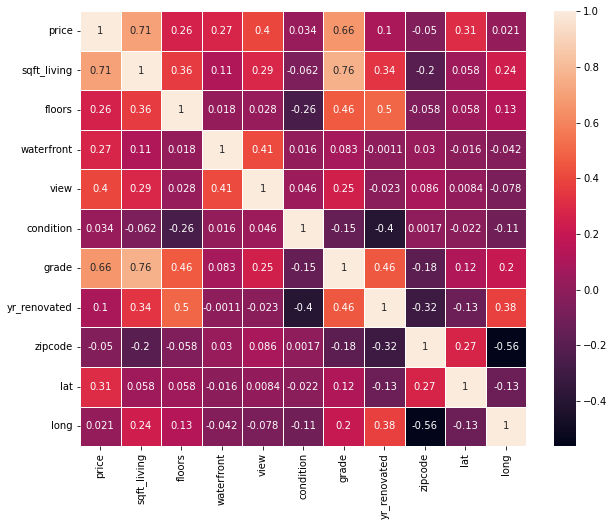

In [196]:
# Create Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(regression_df.corr(), linewidth = 0.5, annot = True, ax = ax );

In [197]:
# Drop Outliers
outlier_dropped_df = regression_df[regression_df['price'] < regression_df['price'].quantile(0.95)]


In [198]:
# View shape of new DataFrame
outlier_dropped_df.shape

(14970, 11)

/var/folders/q_/g2zssbt10h1blxnpvcp374lw0000gn/T/ipykernel_19730/49815498.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


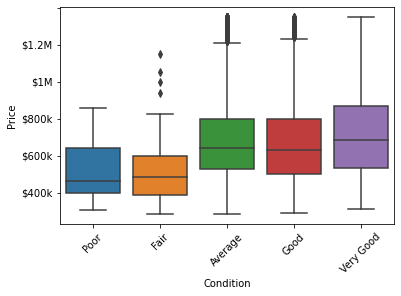

In [248]:
# Create boxplots to demonstrate relationship between condition and price
xlabels = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
ylabels = ['$200k', '$400k', '$600k', '$800k', '$1M', '$1.2M']
ax = sns.boxplot(x="condition", y="price", data=outlier_dropped_df)
ax.set_xticklabels(xlabels)
plt.xticks(rotation = 45)
ax.set_yticklabels(ylabels)
ax.set_ylabel('Price')
ax.set_xlabel('Condition')
plt.show()

In [199]:
# Create MultiLinear Regression Model
y= outlier_dropped_df['price']
X = outlier_dropped_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)


(LinearRegression(), 0.6679968076043092, 90997.16591547601, 120969.91698078791)


In [200]:
# Execute a Log Transformation on Price and SqFt Living columns
log_scaled_df = regression_df.copy()

log_scaled_df['price'] = np.log(regression_df['price'])
log_scaled_df['sqft_living'] = np.log(regression_df['sqft_living'])

log_scaled_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long
1,13.195614,7.851661,2.0,0,0,2,7,1991.0,98125,47.7210,-122.319
3,13.311329,7.580700,1.0,0,0,4,7,1965.0,98136,47.5208,-122.393
4,13.142166,7.426549,1.0,0,0,2,8,1987.0,98074,47.6168,-122.045
5,14.022525,8.597851,1.0,0,0,2,11,2001.0,98053,47.6561,-122.005
6,12.458775,7.447168,2.0,0,0,2,7,1995.0,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,7.177782,2.0,0,0,2,8,2008.0,98116,47.5773,-122.409
21592,12.793859,7.333023,3.0,0,0,2,8,2009.0,98103,47.6993,-122.346
21593,12.899220,7.745003,2.0,0,0,2,8,2014.0,98146,47.5107,-122.362
21594,12.904459,6.927558,2.0,0,0,2,7,2009.0,98144,47.5944,-122.299


In [201]:
# Create Multi Linear Regression Model using transformed features
y= log_scaled_df['price']
X = log_scaled_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.7473161085165828, 0.20585516800954073, 0.2646559219151676)


In [202]:
# Separate houses in 'good' condition and houses in 'bad' condition
good_df = log_scaled_df[log_scaled_df['condition'] >= 2]
bad_df = log_scaled_df[log_scaled_df['condition'] < 2]

In [203]:
# Train model on 'Good' condition houses
y_good = good_df['price']
X_good = good_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y_good, X_good)

results

(LinearRegression(),
 0.7491846998576429,
 0.20726057790924196,
 0.26597313157433494)

In [204]:
# Run model on bad condition houses
y_bad = bad_df['price']
X_bad = bad_df.drop(columns = ['price', 'floors', 'condition'])

y_pred = results[0].predict(X_bad)

# Calculate difference between predicted Price and actual Price
y_difs = y_pred - y_bad

In [205]:
# Sort differences 
y_difs.sort_values(ascending = False)

16879    1.140243
5522     1.040823
12294    0.979316
10573    0.893763
8716     0.786427
           ...   
4081    -0.622770
18228   -0.665831
10416   -0.749217
18861   -0.905677
8614    -1.085949
Name: price, Length: 150, dtype: float64

In [206]:
# Use function in lineregress.py to run 100 models
results = model_averages(y_good, X_good, y_bad, X_bad, 100)

results_df = results[0]
print(results[1])

0.2049243494554281


/Users/markhurtado/Documents/Flatiron/dsc-phase-2-project-v2-3/linregress.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results_df[str(count)] = model[0].predict(X_predict)


In [207]:
# Unlogging price and averages
results_df['price'] = np.exp(results_df['price'])
results_df['averages'] = np.exp(results_df['averages'])

In [208]:
# Calculate expected return
results_difs = results_df['averages'] - results_df['price']

In [209]:
# Create Final DataFrame
final_df = regression_df[regression_df['condition'] < 2].copy()

final_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long
36,550000.0,1660,1.0,0,0,0,5,1933.0,98052,47.6621,-122.132
38,240000.0,1220,1.0,0,0,1,7,1969.0,98001,47.3341,-122.282
242,455000.0,1430,1.5,0,0,1,7,1925.0,98115,47.6727,-122.299
328,186375.0,1000,1.0,0,0,1,7,1952.0,98166,47.4720,-122.344
380,270000.0,1380,1.0,0,0,0,6,1954.0,98011,47.7461,-122.195
...,...,...,...,...,...,...,...,...,...,...,...
19219,200000.0,960,1.0,0,0,1,6,1933.0,98024,47.5621,-121.862
19284,174900.0,1100,1.5,0,0,1,6,1926.0,98108,47.5279,-122.318
19348,290000.0,2340,2.0,0,0,1,8,1978.0,98042,47.3468,-122.091
19433,450000.0,1350,1.0,0,0,1,6,1946.0,98055,47.4657,-122.198


In [210]:
# Create Column for Predicted price and estimated renovation cost
final_df['pred_price'] = results_difs
final_df['estimated_cost'] = final_df['sqft_living'] * 30

In [211]:
# Create column for estimated profit
final_df['estimated_profit'] = final_df['pred_price'] - final_df['estimated_cost'] - final_df['price']

In [212]:
# Sort final_df by estimated profit
final_df.sort_values('estimated_profit', ascending = False, inplace = True)

In [213]:
final_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,pred_price,estimated_cost,estimated_profit
16879,125000.0,1230,1.5,0,0,0,6,1916.0,98117,47.6941,-122.365,259812.278330,36900,9.791228e+04
12294,196000.0,1510,1.0,0,0,0,7,1966.0,98028,47.7758,-122.238,320034.945396,45300,7.873495e+04
5522,119500.0,1170,1.0,0,0,1,6,1980.0,98019,47.7346,-121.983,215206.081128,35100,6.060608e+04
10573,95000.0,1070,1.0,0,0,1,6,1948.0,98058,47.4338,-122.183,134786.464479,32100,7.686464e+03
8716,155000.0,1250,1.0,0,0,1,7,1949.0,98108,47.5292,-122.323,181769.507939,37500,-1.073049e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,850000.0,5440,1.0,0,0,1,9,1969.0,98001,47.3540,-122.293,-96367.910967,163200,-1.109568e+06
1600,800000.0,2350,1.0,0,1,1,7,1952.0,98040,47.5743,-122.238,-262052.376645,70500,-1.132552e+06
10416,1200000.0,2480,1.0,0,0,1,7,1955.0,98052,47.6759,-122.114,-630177.417808,74400,-1.904577e+06
18861,1500000.0,1910,1.0,0,0,0,8,1955.0,98004,47.6453,-122.214,-890251.743322,57300,-2.447552e+06


In [214]:
# Select profitable investment opportunities
profitable_df = final_df.loc[final_df['estimated_profit'] > 0]

profitable_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,pred_price,estimated_cost,estimated_profit
16879,125000.0,1230,1.5,0,0,0,6,1916.0,98117,47.6941,-122.365,259812.278330,36900,97912.278330
12294,196000.0,1510,1.0,0,0,0,7,1966.0,98028,47.7758,-122.238,320034.945396,45300,78734.945396
5522,119500.0,1170,1.0,0,0,1,6,1980.0,98019,47.7346,-121.983,215206.081128,35100,60606.081128
10573,95000.0,1070,1.0,0,0,1,6,1948.0,98058,47.4338,-122.183,134786.464479,32100,7686.464479


In [215]:
# Identify zip codes with the most profitable investment opportunities
profitable_df['zipcode'].value_counts()

98117    1
98028    1
98019    1
98058    1
Name: zipcode, dtype: int64

In [216]:
# Calculate total investment for profitable properties
total_investment_cost = profitable_df['estimated_cost'].sum() + profitable_df['price'].sum()

total_investment_cost

684900.0

In [217]:
# Calculate total revenue from predicted sale of properties
total_revenue = profitable_df['pred_price'].sum()

total_revenue

929839.7693320992

In [218]:
# Calculate total profit
total_profit = profitable_df['estimated_profit'].sum()

total_profit

244939.7693320992

In [223]:
# Create a map and plot profitable investments
import folium
lat = 47.659575
long = -122.19225

x = profitable_df['lat']
y = profitable_df['long']
points = list(zip(x, y))

base_map = folium.Map([lat,long],zoom_start= 9,)
base_map

for p in points:
    lat = p[0]
    long = p[1]
    popup_text = "Latitude: {}, Longitude: {}".format(lat,long)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
base_map
